In [ ]:
import networkx as nx

# 4.2.1 Scale-Free Networks


TypeError: scale_free_graph() got an unexpected keyword argument 'create_using'

create_using 매개변수는 NetworkX에서 그래프를 생성할 때 사용할 그래프 클래스를 지정하는데 사용됨. create_using=None은 기본값이기 때문에 에러나서 지워버렸음

In [ ]:
# scale-free 네트워크 생성
g = nx.scale_free_graph(40, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, seed=None)

- alpha, beta, gamma는 scale-free 네트워크 생성에 사용되는 매개변수로, 노드가 다른 노드와 연겨로디는 경향을 제어함.

- delta_in, delta_out은 노드의 차수를 제어하는 매개변수로, 높은 차수의 노드가 생성될 가능성을 조절함.

      delta_in 매개변수는 노드가 다른 노드로 들어오는 링크를 형성할 때 사용됨.
      * 값을 감소시키면 높은 차수의 노드가 생성될 가능성이 낮아지게 됨.

      delta_out 매개변수는 노드가 다른 노드로 나가는 링크를 형성할 때 사용됨.
      * 값을 감소시키면 높은 차수의 노드가 생성될 가능성이 낮아지게 됨.

- seed는 무작위성을 제어하기 위한 시드값.

  시드값이 지정되지 않으면 무작위로 그래프가 생성됨.





지난 실습처럼 info를 사용할 수 없어서 직접 계산해서 출력해야함.

In [ ]:
print('Name:', g.name) # 매개변수를 저장할 딕셔너리를 생성해서 그래프 객체에 매개변수 추가하는 함수를 생성해서 사용해야하지 않을까.. 이 방법 말고는 모르겠습니다... g.name은 출력이 안됨.
print('Type:', str(type(g)).split('.')[-1][:-2]) #print('Type:', type(g)) 책과 같은 결과가 나오게 하기 위해서 문자열에 넣어 '.'을 기준으로 자르고 출력함..
print('Number of nodes', len(g.nodes))
print('Number of edges', len(g.edges))
print('Average in degree:', sum(dict(g.in_degree()).values()) / len(g.nodes))
print('Average out degree:',sum(dict(g.out_degree()).values()) / len(g.nodes))

Name: 
Type: MultiDiGraph
Number of nodes 40
Number of edges 80
Average in degree: 2.0
Average out degree: 2.0


 - g.in_degree()는 각 노드에 들어오는 링크의 개수를 포함하는 딕셔너리를 반환하며,

 dict(g.in_degree()).values()는 각 노드의 인바운드 링크 수를 값으로 가지는 리스트를 생성함.

 그 후 이 값을 모두 합하여 노드 수로 나누어 평균을 계산함.

 - g.out_degree()는 각 노드에서 나가는 링크의 개수를 포함하는 딕셔너리를 반환하며,

 dict(g.out_degree()).values()는 각 노드의 아웃바운드 링크 수를 값으로 가지는 리스트를 생성함.

  그 후 이 값을 모두 합하여 노드 수로 나누어 평균을 계산함.

In [ ]:
from matplotlib import pyplot as plt

layout = nx.spring_layout(g) 에러 떠서 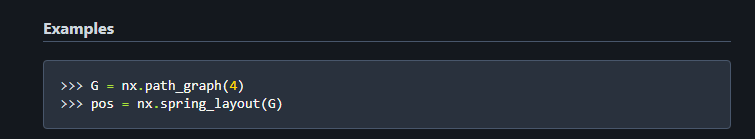

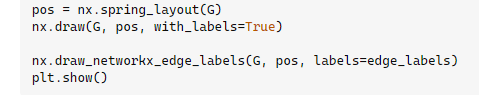

NetworkX 문서와 스택오버플로우를 참고했음

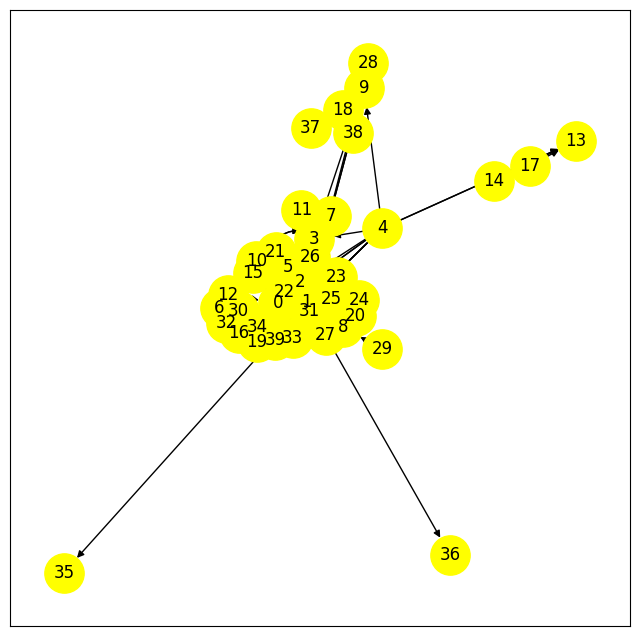

In [ ]:
plt.figure(figsize=(8,8))
#layout = nx.spring_layout(g)
pos = nx.spring_layout(g)
nx.draw_networkx(g, pos=pos, with_labels=True, node_size=800, node_color='yellow')

# 4.2.2 Small-World Networks

In [ ]:
g = nx.watts_strogatz_graph(25, 5, 0.4)

In [ ]:
print('Name:', g.name)
print('Type:', str(type(g)).split('.')[-1][:-2])
print('Number of nodes', len(g.nodes))
print('Number of edges', len(g.edges))
print('Average degree', sum(dict(g.degree).values()) / len(g.nodes))

Name: 
Type: Graph
Number of nodes 25
Number of edges 50
Average degree 4.0


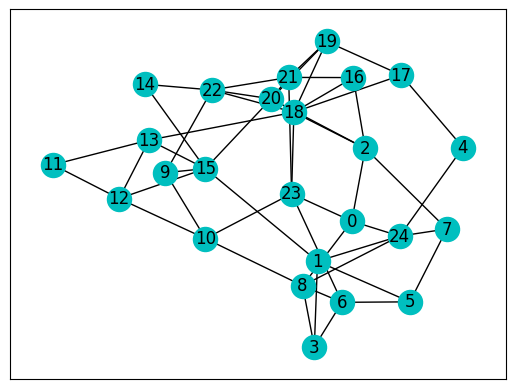

In [ ]:
nx.draw_networkx(g, node_color='c', node_size=300)

# 4.7 Data Sampling

In [ ]:
import sys
import os
import urllib.request

-  LiveJournal에서 사용자의 친구 목록을 가져와서 NetworkX 그래프에 edge를 추가

책의 코드대로 하면 바이트 형식이라 에러가 뜸

디코딩 후에 진행

In [ ]:
def read_lj_friends(g, name):
 # fetch the friend-list from LiveJournal
  response=urllib.request.urlopen('http://www.livejournal.com/misc/fdata.bml?user='+name)
  for line in response.readlines():
    line = line.decode('utf-8') # 문자열로 디코딩
    #Comments in the response start with a '#'
    if line.startswith('#'): continue
    # the format is "< name" (incoming) or "> name" (outgoing)
    parts=line.split()
    #make sure that we do not have an empty line
    if len(parts)==0: continue
    #add the edge to the network
    if parts[0]=='<':
        g.add_edge(parts[1],name) # 해당 친구가 사용자(name)에게 들어오는 것
    else:
        g.add_edge(name,parts[1]) # 사용자(name)에서 친구가 나가는 것

함수의 매개변수

- g: NetworkX 그래프 객체.
- center: 스노우볼 샘플링의 중심 노드.
- max_depth: 스노우볼 샘플링의 최대 깊이. 기본값은 1.
- current_depth: 현재 탐색 깊이를 나타내는 변수.
- taboo_list: 방문한 노드를 추적하기 위한 리스트.

In [ ]:
def snowball_sampling(g, center, max_depth=1, current_depth=0, taboo_list=[]):
  # if we have reached the depth limit of the search, bomb out.
  print(center, current_depth, max_depth, taboo_list)
  if current_depth==max_depth: # 현재 깊이가 최대 깊이에 도달하면 함수는 taboo_list를 반환하고 종료
    print('out of depth')
    return taboo_list
  if center in taboo_list: # 중심 노드가 taboo_list에 이미 포함되어 있으면 함수는 taboo_list를 반환하고 종료
    print('taboo')
    return taboo_list #we've been here before
  else:
    taboo_list.append(center) # 그렇지 않으면 중심 노드를 taboo_list에 추가
    read_lj_friends(g, center) # read_lj_friends 함수를 호출하여 해당 노드의 친구 목록을 읽어옴
  for node in g.neighbors(center):
      taboo_list=snowball_sampling(g, node, current_depth=current_depth+1, max_depth=max_depth, taboo_list=taboo_list) # 재귀함수
  return taboo_list

In [ ]:
g=nx.Graph()
snowball_sampling(g,'valerois')

valerois 0 1 []
bagira 1 1 ['valerois']
out of depth
angerona 1 1 ['valerois']
out of depth
yankel 1 1 ['valerois']
out of depth
yelya 1 1 ['valerois']
out of depth
ponka 1 1 ['valerois']
out of depth
marinka 1 1 ['valerois']
out of depth
saper 1 1 ['valerois']
out of depth
levinius 1 1 ['valerois']
out of depth
monella 1 1 ['valerois']
out of depth
irbisa 1 1 ['valerois']
out of depth
innaplanetyanka 1 1 ['valerois']
out of depth
hutshepsut 1 1 ['valerois']
out of depth
skyg74 1 1 ['valerois']
out of depth
samoleg 1 1 ['valerois']
out of depth
actr 1 1 ['valerois']
out of depth
gottfrid 1 1 ['valerois']
out of depth
krimsky 1 1 ['valerois']
out of depth
nelis 1 1 ['valerois']
out of depth
ptfenix 1 1 ['valerois']
out of depth
a_u 1 1 ['valerois']
out of depth
e_f 1 1 ['valerois']
out of depth
boctok 1 1 ['valerois']
out of depth
karial 1 1 ['valerois']
out of depth
wattson 1 1 ['valerois']
out of depth
baryshnia 1 1 ['valerois']
out of depth
ntl 1 1 ['valerois']
out of depth
salamandr

['valerois']

In [ ]:
nx.write_pajek(g, "LiveJournaData.net") # 그래프를 Pajek 포맷으로 저장